In [1]:
# this section shows how to use the dimensional reduction technique, to reduce number of features in image data, and reconstruct images using clustering
from sklearn.datasets import fetch_olivetti_faces
import numpy as np 
import matplotlib.pyplot as plt 

faces = fetch_olivetti_faces()
X = faces.data # image data with 4096 points, 64*64 = 4096
y = faces.target


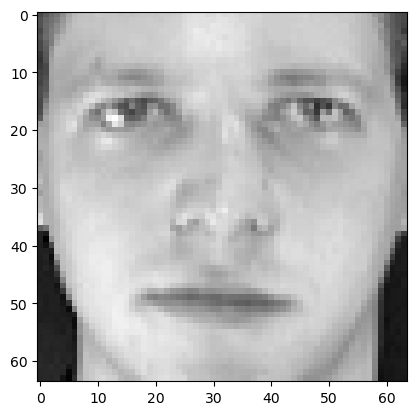

In [2]:
# see one image
plt.imshow(X[0].reshape(64,64),cmap='gray')
plt.show()

In [4]:
from sklearn.decomposition import PCA

'''In general, one can start by fitting the PCA model using all the available features, keeping in mind that PCA uses min(n_samples, n_features) while fittng.
In fitting with all features, the explained variance ratio will be 100%. One can also experiment with how the variance ratio changes with changing n_components.
 ''' 
n_components = 100
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(X)
print(f"Data shapes after reduction: {X_pca.shape}, original: {X.shape}")

Data shapes after reduction: (400, 100), original: (400, 4096)


In [5]:
print(f"With dimensions reduced to {n_components} from 4096, Explained variance: {round(sum(pca.explained_variance_ratio_)*100,2)}%")

With dimensions reduced to 100 from 4096, Explained variance: 93.5%


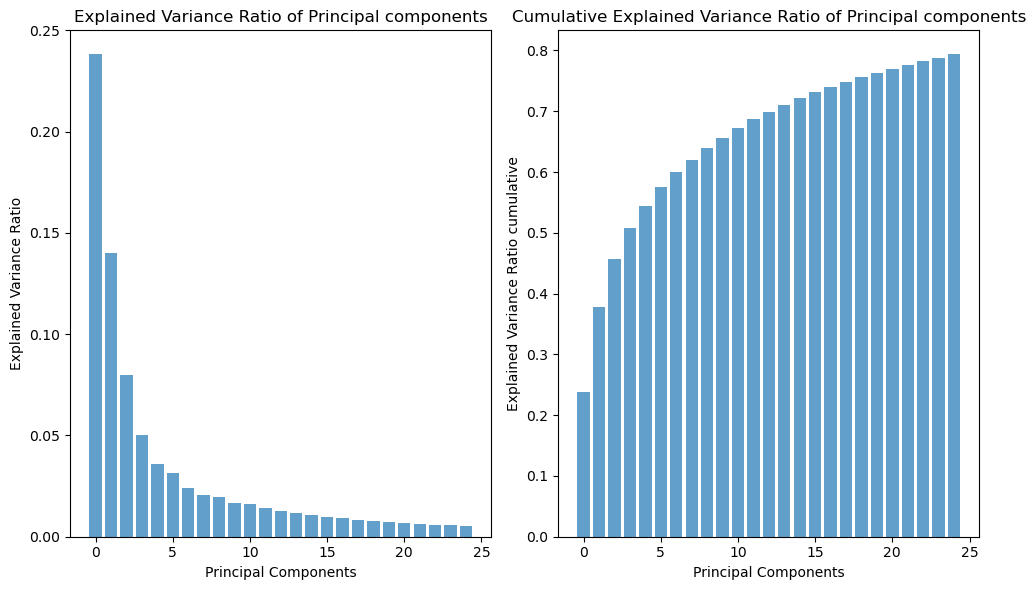

In [6]:
'''Here, the importance of each components after performing the dimensional reduction is shown. This will give an idea which components are contributing more, and the ones that 
contribute less can be ignored. 
'''
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_cumsum = np.cumsum(explained_variance_ratio)
# print(explained_variance_ratio)
# print(np.cumsum(explained_variance_ratio))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.bar(range(n_components//4), explained_variance_ratio[:n_components//4], alpha=0.7) # plot only the 25 components. 100//4 = 25
ax.set_xlabel('Principal Components')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained Variance Ratio of Principal components')

ax1.bar(range(n_components//4), explained_variance_ratio_cumsum[:n_components//4], alpha=0.7)
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained Variance Ratio cumulative')
ax1.set_title('Cumulative Explained Variance Ratio of Principal components')
plt.tight_layout()
plt.show()

The plots suggests that with only about 10 principal components, almost 70% of variation in data can be described. To check this, we keep only the first 10 components, and 
try to reconstruct the face of the person.

In [8]:
for i in range(0,110,10):
    print(f"Variance explained using first {i} components: {round(sum(explained_variance_ratio[:i]),2)*100}%")

Variance explained using first 0 components: 0%
Variance explained using first 10 components: 66.0%
Variance explained using first 20 components: 76.0%
Variance explained using first 30 components: 82.0%
Variance explained using first 40 components: 85.0%
Variance explained using first 50 components: 87.0%
Variance explained using first 60 components: 89.0%
Variance explained using first 70 components: 91.0%
Variance explained using first 80 components: 92.0%
Variance explained using first 90 components: 93.0%
Variance explained using first 100 components: 93.0%


In [9]:
# try reconstructing with 15 components
n_components = 15
pca15 = PCA(n_components=n_components, whiten=True, random_state=42)
X_pca = pca15.fit_transform(X)

reconstructed_image = pca15.inverse_transform(pca15.transform(X[0].reshape(1,-1))) # first transform the image by reducing to 15 principal components, then inverse transform to reconstruct



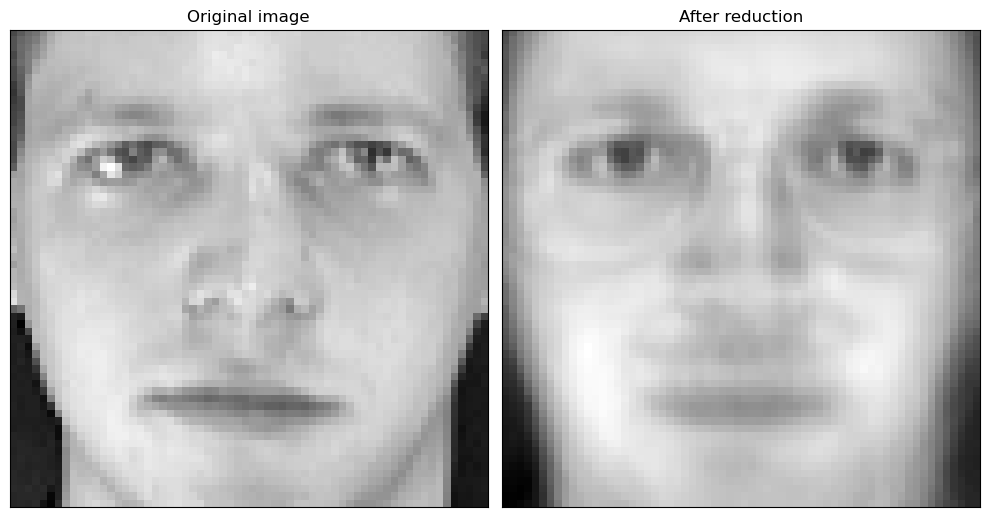

In [19]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.imshow(X[0].reshape(64,64), cmap='gray')
ax.set_title("Original image")

ax1.imshow(reconstructed_image.reshape(64,64), cmap='gray')
ax1.set_title("After reduction")
for axes in [ax,ax1]:
    axes.set_xticks([])
    axes.set_yticks([])

# plt.imshow(reconstructed_image.reshape(64,64),cmap='gray')
plt.tight_layout()
plt.show()